Task 2: Exploratory Data Analysis (EDA)

Objective: Understand data using statistics and visualizations.

Tools: Pandas, Matplotlib, Seaborn, Plotly


## Data Cleaning & Preprocessing

In [19]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('Titanic-Dataset.csv')

In [21]:
# Let's understand the data, how it look like.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
# Let's understand the type of values in each column of our dataframe 'df'.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [23]:
# check for duplicate entries
print(df.duplicated().sum())

0


In [24]:
# check for null entries
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [25]:
# Fill missing 'Age' with median
df['Age'].fillna(df['Age'].median(), inplace=True)

/tmp/ipython-input-1672961352.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [26]:
# Fill missing 'Embarked' with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-3012200906.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [27]:
# Drop 'Cabin' due to too many missing values
df.drop(columns='Cabin', inplace=True)

In [28]:
# check for null entries
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [29]:
# Convert 'Sex' and 'Embarked' into numeric using one-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Sex_male     891 non-null    bool   
 10  Embarked_Q   891 non-null    bool   
 11  Embarked_S   891 non-null    bool   
dtypes: bool(3), float64(2), int64(5), object(2)
memory usage: 65.4+ KB


In [31]:
from sklearn.preprocessing import StandardScaler
# Select numerical columns to scale
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

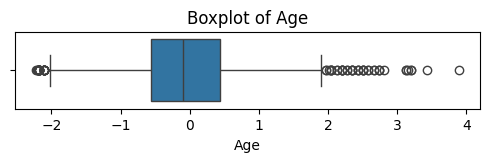

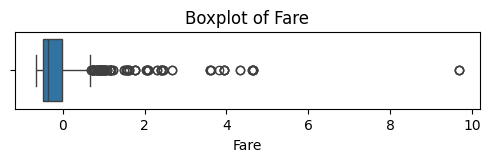

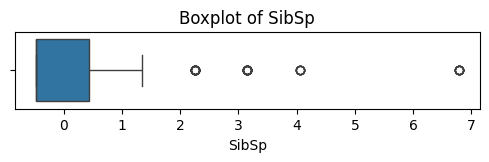

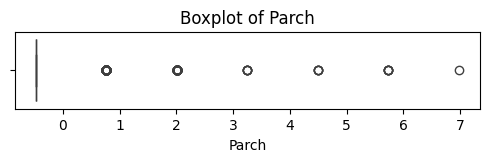

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplots to visualize outliers
for col in num_cols:
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [33]:
# Remove outliers using IQR method
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

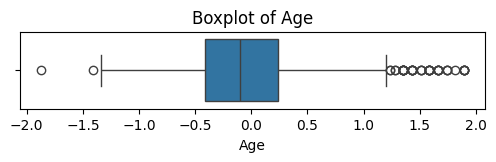

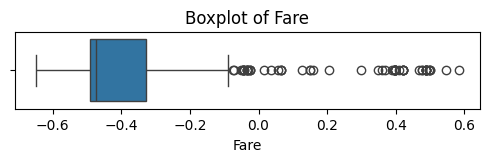

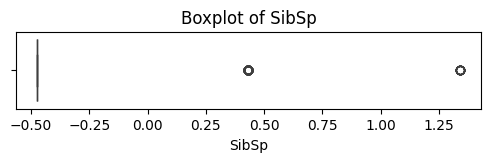

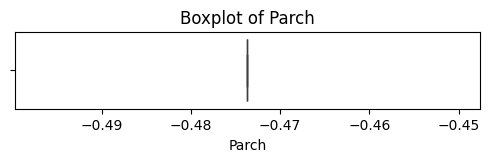

In [34]:
# Boxplots to visualize outliers
for col in num_cols:
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

## 1.Generate summary statistics (mean, median, std, etc.)

In [35]:
# Generate summary statistics (mean, median, std, etc.)
display(df.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02,577.000000
mean,450.590988,0.299827,2.502600,-0.004480,-0.293706,-4.736736e-01,-0.347884
std,259.568357,0.458579,0.733909,0.657194,0.403796,2.777966e-16,0.253828
min,1.000000,0.000000,1.000000,-1.872184,-0.474545,-4.736736e-01,-0.648422
25%,222.000000,0.000000,2.000000,-0.412037,-0.474545,-4.736736e-01,-0.491874
50%,455.000000,0.000000,3.000000,-0.104637,-0.474545,-4.736736e-01,-0.474005
75%,676.000000,1.000000,3.000000,0.241187,-0.474545,-4.736736e-01,-0.329287
max,891.000000,1.000000,3.000000,1.893459,1.340132,-4.736736e-01,0.583318


## 2.Create histograms and boxplots for numeric features.

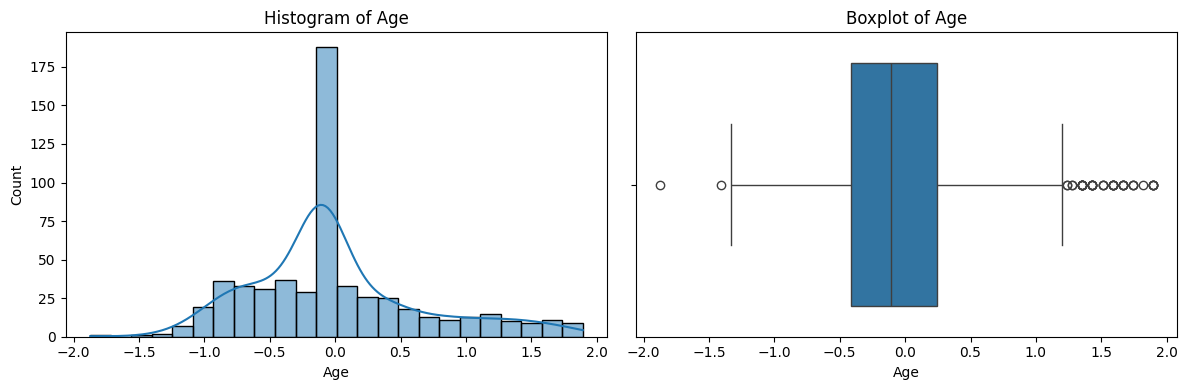

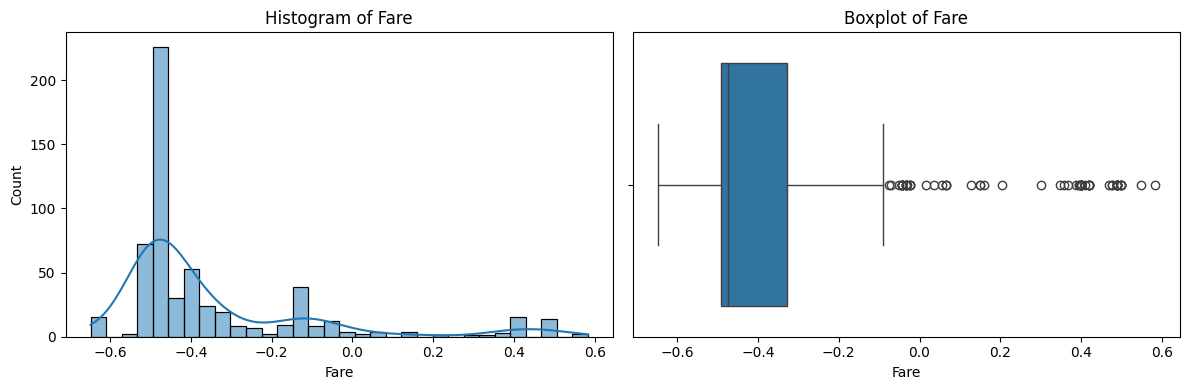

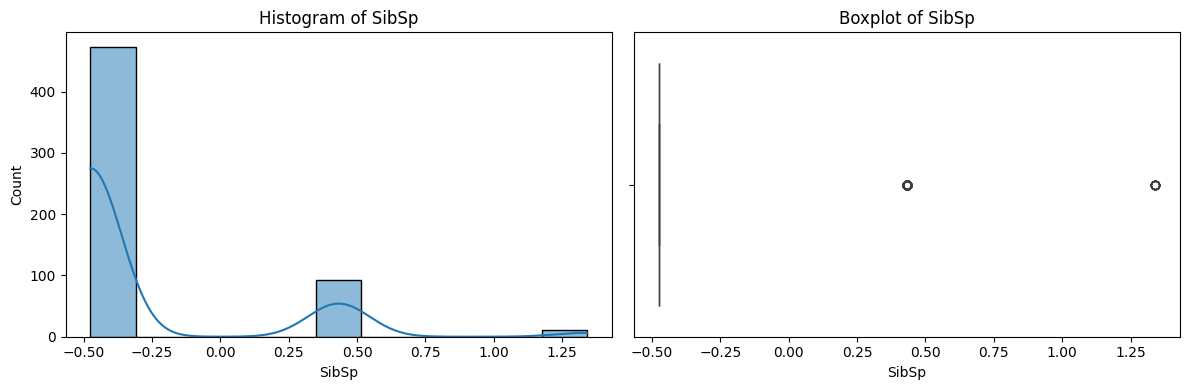

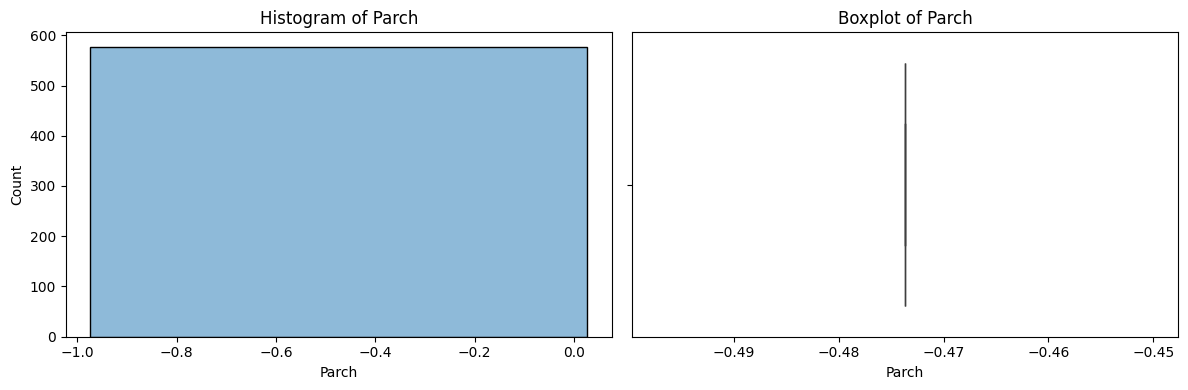

In [36]:
# Create histograms and boxplots for numeric features.
for col in num_cols:
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

## 3.Use pairplot/correlation matrix for feature relationships.

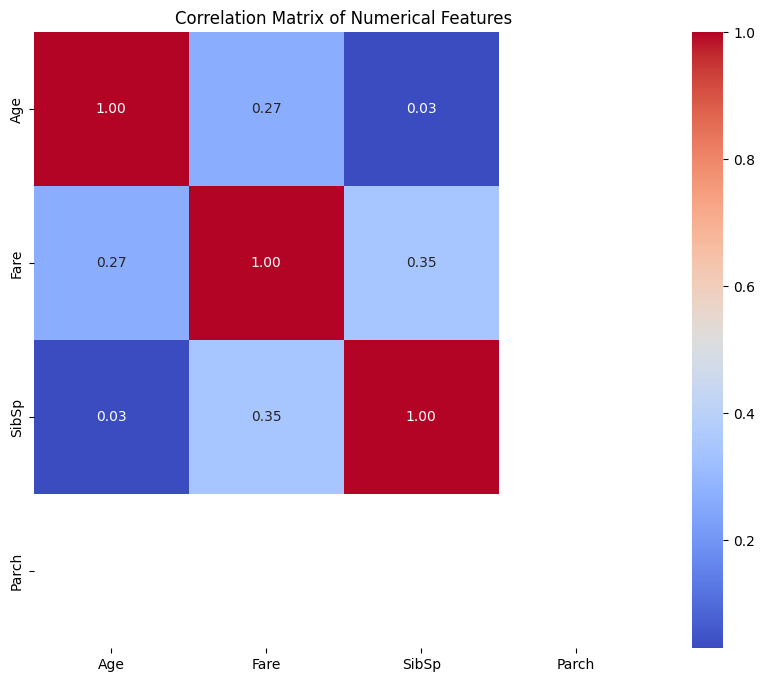

In [39]:
# Use correlation matrix for feature relationships.
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

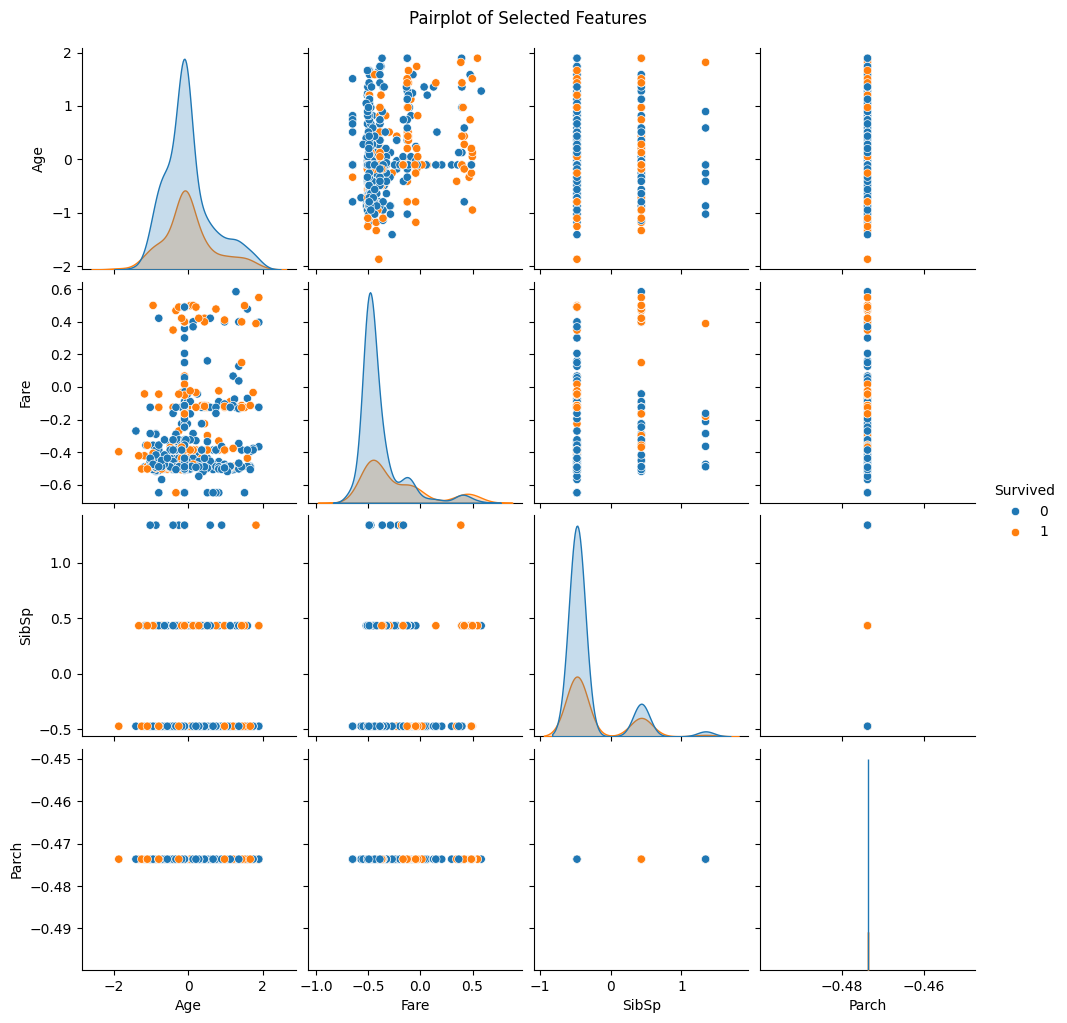

In [40]:
# Use a subset to avoid overplotting
subset = ['Age', 'Fare', 'SibSp', 'Parch', 'Survived']

sns.pairplot(df[subset].dropna(), hue='Survived')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

## 4.Identify patterns, trends, or anomalies in the data.

In [41]:
# Survival rate comparison by gender
df.groupby('Sex_male')['Survived'].mean()

,Survived
Sex_male,
False,0.72028
True,0.16129


Females had a much higher survival rate than males.

In [42]:
# Survival Rate by Passenger Class
df.groupby('Pclass')['Survived'].mean()

,Survived
Pclass,
1,0.530120
2,0.371901
3,0.225201


Higher-class passengers (Pclass = 1) survived more often than lower-class passengers.

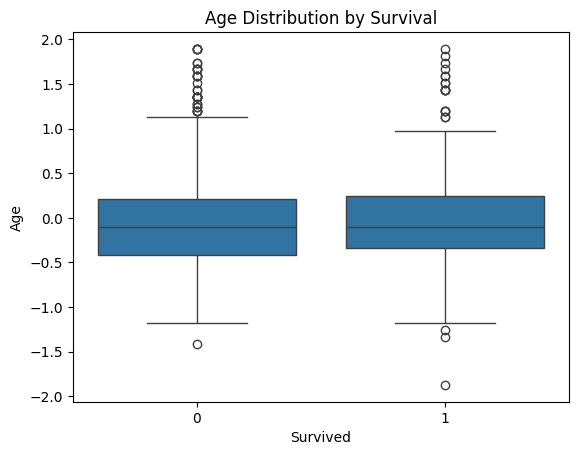

In [44]:
# Age vs. Survival (Trend or Anomaly)
sns.boxplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival')
plt.show()

Younger passengers, especially children, had higher survival chances.

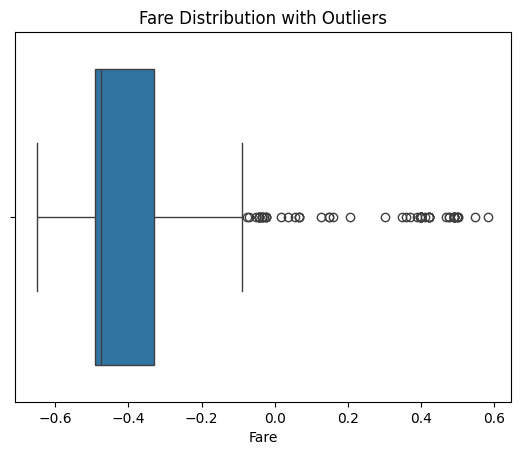

In [45]:
# Fare Distribution — Detecting Anomalies
sns.boxplot(x=df['Fare'])
plt.title('Fare Distribution with Outliers')
plt.show()

Some fares are extremely high, indicating possible outliers (rich passengers, group tickets).

In [47]:
# Calculate correlation with 'Survived'
# Exclude non-numeric columns like 'Name' and 'Ticket'
df.drop(columns=['Name', 'Ticket']).corr()['Survived'].sort_values(ascending=False)

,Survived
Survived,1.000000
Fare,0.268890
Embarked_Q,0.118176
SibSp,0.097999
Age,0.009310
PassengerId,-0.050556
Embarked_S,-0.147059
Pclass,-0.242189
Sex_male,-0.526748
Parch,NaN


'Sex_male' (negatively), 'Pclass', and 'Fare' show strong relationships with survival.

## 5.Make basic feature-level inferences from visuals.

1. Sex vs. Survival
From boxplots or group-by plots:

Female passengers had much higher survival rates.

Male passengers were less likely to survive.

Inference: Gender strongly influenced survival — women were prioritized in rescue efforts.

2. Pclass vs. Survival
From histograms and group means:

Survival rate is highest in 1st class, then 2nd, lowest in 3rd class.

Inference: Higher-class passengers had better access to lifeboats and help.


3. Age Distribution
From boxplots and pairplot:

Survivors included more younger passengers (especially children).

Some older passengers survived, especially in 1st class.

Inference: Young age slightly increased survival odds, especially with family support.

4. Fare Patterns
From boxplots and pairplots:

A few passengers paid extremely high fares (outliers).

Higher fares correlate with higher survival and 1st class.

Inference: Fare is a proxy for wealth/class, which influenced survival.

5. SibSp & Parch (Family Onboard)
From pairplot:

Survival is slightly higher when people had 1–2 family members with them.

Very high family counts (≥4) lowered survival — possibly harder to escape as a group.

Inference: Being with some family may have helped, but large families were at a disadvantage.

6. Correlation Matrix
Sex_male has a negative correlation with survival.

Fare has a positive correlation with survival.

Pclass has a negative correlation (higher class = higher survival).

Inference: These features are likely to be predictive and useful for modeling.